# [中選會總統](https://www.cec.gov.tw/pc/zh_TW/IDX/indexP1.html)

### 導入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)
%matplotlib inline
import copy
import pickle
import requests # 讀取網頁資料
import bs4
from selenium import webdriver

In [2]:
headers = {'user-agent':'Mozilla/5.0 (X11; Linux x86_64)'}
def get_soup(url, headers=headers):
    r = requests.get(url, headers=headers)
    rt = r.text
    soup = bs4.BeautifulSoup(rt, "html.parser")
    
    return soup

In [3]:
url = 'https://www.cec.gov.tw/pc/zh_TW/IDX/indexP1.html'
soup = get_soup(url)

### 發現選區是由JAVA Script 產生

In [4]:
soup.select('script')

[<script src="../js/ftiens4.js" type="text/javascript"></script>,
 <script src="../js/ua.js" type="text/javascript"></script>,
 <script src="../js/func.js" type="text/javascript"></script>,
 <script src="../js/treeP1.js" type="text/javascript"></script>,
 <script>initializeDocument()</script>]

### 找到那份資料來觀察分析

In [5]:
url = 'https://www.cec.gov.tw/pc/zh_TW/js/treeP1.js'

soup = get_soup(url)
print(soup.prettify())

// JavaScript Document

var menuTitle = "查詢項目 (總統副總統)";

var menuLevel_1 = "候選人得票數";
var menuLevel_2 = "候選人簡歷";
var menuLevel_3 = "選舉概況";

var strAll = "全部";
var strAllC = "全國";

var orderBy = checkOrder();

var secAreaName = new Array();
var secAreaID = new Array();

var secAreaNumber = 22;

for(i=0;i&lt;secAreaNumber;i++)
{
        secAreaName[i] = new Array();
        secAreaID[i] = new Array();
}

secAreaName[0][0]='臺北市';
secAreaID[0][0]='63000000000000000';
secAreaName[1][0]='新北市';
secAreaID[1][0]='65000000000000000';
secAreaName[2][0]='桃園市';
secAreaID[2][0]='68000000000000000';
secAreaName[3][0]='臺中市';
secAreaID[3][0]='66000000000000000';
secAreaName[4][0]='臺南市';
secAreaID[4][0]='67000000000000000';
secAreaName[5][0]='高雄市';
secAreaID[5][0]='64000000000000000';
secAreaName[6][0]='新竹縣';
secAreaID[6][0]='10004000000000000';
secAreaName[7][0]='苗栗縣';
secAreaID[7][0]='10005000000000000';
secAreaName[8][0]='彰化縣';
secAreaID[8][0]='10007000000000000';
secAreaName[9][0]='南投縣';
secAreaID[9]

In [6]:
lst = []
for text in soup.prettify().split(';'):
    if (len(text) < 50) and ('Area' in text) and ('][' in text):
        lst.append(text[text.find('Area'):])
        
lst

["AreaName[0][0]='臺北市'",
 "AreaID[0][0]='63000000000000000'",
 "AreaName[1][0]='新北市'",
 "AreaID[1][0]='65000000000000000'",
 "AreaName[2][0]='桃園市'",
 "AreaID[2][0]='68000000000000000'",
 "AreaName[3][0]='臺中市'",
 "AreaID[3][0]='66000000000000000'",
 "AreaName[4][0]='臺南市'",
 "AreaID[4][0]='67000000000000000'",
 "AreaName[5][0]='高雄市'",
 "AreaID[5][0]='64000000000000000'",
 "AreaName[6][0]='新竹縣'",
 "AreaID[6][0]='10004000000000000'",
 "AreaName[7][0]='苗栗縣'",
 "AreaID[7][0]='10005000000000000'",
 "AreaName[8][0]='彰化縣'",
 "AreaID[8][0]='10007000000000000'",
 "AreaName[9][0]='南投縣'",
 "AreaID[9][0]='10008000000000000'",
 "AreaName[10][0]='雲林縣'",
 "AreaID[10][0]='10009000000000000'",
 "AreaName[11][0]='嘉義縣'",
 "AreaID[11][0]='10010000000000000'",
 "AreaName[12][0]='屏東縣'",
 "AreaID[12][0]='10013000000000000'",
 "AreaName[13][0]='宜蘭縣'",
 "AreaID[13][0]='10002000000000000'",
 "AreaName[14][0]='花蓮縣'",
 "AreaID[14][0]='10015000000000000'",
 "AreaName[15][0]='臺東縣'",
 "AreaID[15][0]='10014000000000000

### 執行文本存下資料

In [7]:
AreaName = {}
AreaID = {}
for exe in lst:
    try:
        exec(exe) # 無法創字典 key 還沒使用
    except:
        exec(f'{exe[:exe.find("][")+1]} = dict()') #先創造 key
        exec(exe)

### 獲取所有網站連結

In [8]:
url_st = 'https://www.cec.gov.tw/pc/zh_TW/P1/n'

for ind1 in AreaID:
    for ind2 in AreaID[ind1]:
        a_name = AreaName[ind1][ind2]
        a_id = AreaID[ind1][ind2]
        a_url = f'{url_st}{a_id}.html'
        if not ind2:
            print(f'{a_name} :')
        else:
            print(f'  {a_name} : {a_url}')

臺北市 :
  松山區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000100000000.html
  信義區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000200000000.html
  大安區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000300000000.html
  中山區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000400000000.html
  中正區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000500000000.html
  大同區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000600000000.html
  萬華區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000700000000.html
  文山區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000800000000.html
  南港區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000000900000000.html
  內湖區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000001000000000.html
  士林區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000001100000000.html
  北投區 : https://www.cec.gov.tw/pc/zh_TW/P1/n63000001200000000.html
新北市 :
  板橋區 : https://www.cec.gov.tw/pc/zh_TW/P1/n65000000100000000.html
  三重區 : https://www.cec.gov.tw/pc/zh_TW/P1/n65000000200000000.html
  中和區 : https://www.cec.gov.tw/pc/zh_TW/P1/n650000

### 讀取單一區的票數 (1號得票數, 1號得票率, 2號得票數, 2號得票率, 3號得票數, 3號得票率)

In [9]:
soup = get_soup('https://www.cec.gov.tw/pc/zh_TW/P1/n63000000100000000.html')
for ind, val in enumerate(soup.select('td.tdAlignRight')):
    print(ind, val.text)

0 5,436
1 4.3294
2 55,918
3 44.5345
4 64,207
5 51.1361


### 爬下所有票數

### 存檔案免得從爬

### 讀檔案

In [2]:
with open('tw_vote.pkl', 'rb') as file:
    pk = file.read()
AreaName, Areavote = pickle.loads(pk)

### 切出要的資料

In [3]:
TW_vote = {}
for ind1 in AreaName:
    for ind2 in AreaName[ind1]:
        if not ind2: # 縣市 or 鄉鎮區
            TW_vote[AreaName[ind1][0] + AreaName[ind1][ind2]] = Areavote[ind1][ind2]

In [4]:
TW_vote = pd.DataFrame(TW_vote)
TW_vote.index = ['宋', '韓', '蔡']
c_lst = ['#ff6213', '#0008a7', '#009b1c'] # 色碼
TW_vote = TW_vote.T

In [5]:
TW_vote

,宋,韓,蔡
臺北市臺北市,70769,685830,875854
新北市新北市,112620,959631,1393936
桃園市桃園市,63132,529749,718260
臺中市臺中市,84800,646366,967304
臺南市臺南市,41075,339702,786471
高雄市高雄市,55309,610896,1097621
新竹縣新竹縣,18435,154224,152380
苗栗縣苗栗縣,15222,164345,147034
彰化縣彰化縣,35060,291835,436336
南投縣南投縣,13315,133791,152046


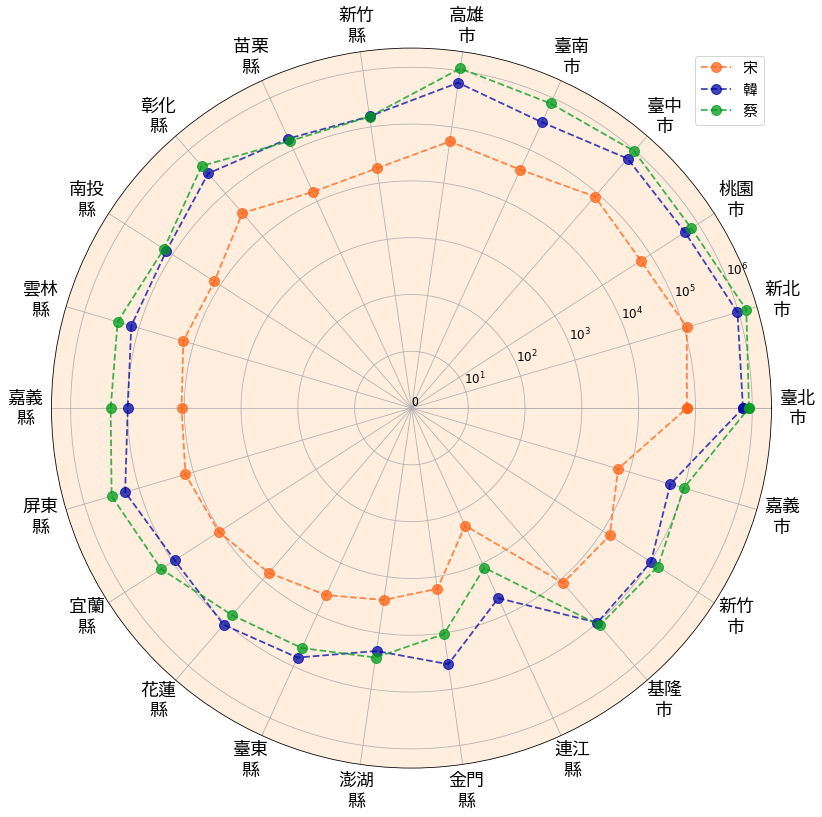

In [6]:
arr = np.log10(TW_vote.iloc[:, 0:3].values.T)
ar =  np.concatenate((arr, arr[:, 0:1]), axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], projection='polar', facecolor='#ffeedd')

angle = np.linspace(0, 2*np.pi, ar.shape[1])
for i in range(3):
    ax.plot(angle, ar[i], 'o--', c=c_lst[i], ms=10, lw=1.8, alpha=0.75, label=TW_vote.columns[i])
for i in range(ar.shape[1]-1):
    area = TW_vote.index[i][3:-1] + '\n' + TW_vote.index[i][-1]
    ax.text(angle[i], 6.8, area, fontsize=18, 
            horizontalalignment='center', verticalalignment='center')
    
plt.xticks(np.linspace(0, 2*np.pi, ar.shape[1]), [])
plt.yticks(range(7), [0, r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'], fontsize=12)
ax.grid(True)
plt.legend(loc=1, fontsize=15)

In [7]:
arr = TW_vote.iloc[:, 0:3].values.T
arr = arr / arr.sum(0) * 100

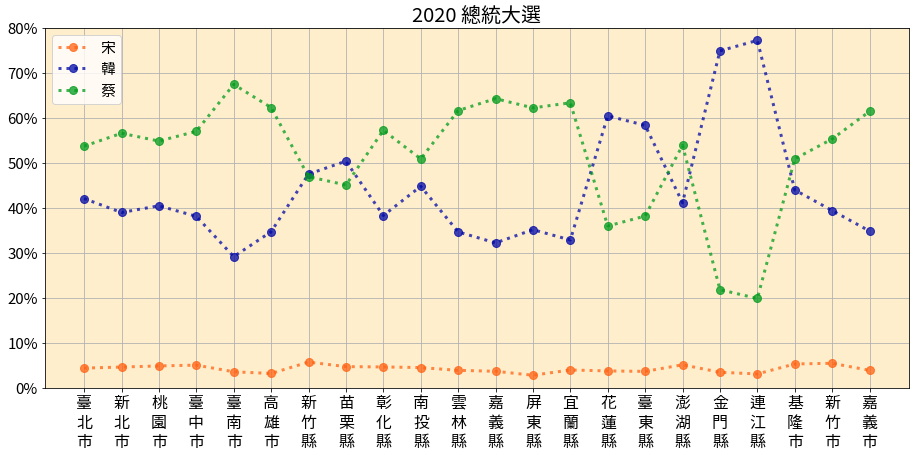

In [8]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=TW_vote.columns[i])
    
xticks = list(TW_vote.index.str[-3]  + '\n' + TW_vote.index.str[-2] + '\n' + TW_vote.index.str[-1])
plt.xticks(range(22), xticks, fontsize=16, horizontalalignment='center')
plt.yticks(range(0, 81, 10), [str(s)+'%' for s in range(0, 81, 10)], fontsize=15)
plt.ylim([0, 80])
plt.title('2020 總統大選', fontsize=20)
ax.grid(True)
plt.legend(loc=2, fontsize=15)

